<center>
<h1>Intelligent Data Analysis Project</h1>
<h4>Matej Bebej (50%), Marian Kurcina (50%)</h4>
</center>

## Table of Contents
Assignment    
Phase 1 - Exploratory Data Analysis
- 1.1 - Basic description of data and their characteristics
  - A - Data structure analysis
      - Observation
      - Patient
      - Station
  - B - Analysis of individual attributes
      - Observation
      - Patient
      - Station
  - C - Paiwise data analysis
  - D - Potential predictors
  - E - Observations
- 1.2 - Identification of problems, data integration, and cleaning
  - A - Data problems
  - B - Data accuracy check
  - C - Outlier detection
- 1.3 - Formulation and statistical verification of hypotheses about the data
  - A - Hypotheses
      - Hypothesis 1 -
      - Hypothesis 2 -
  - B - Statistical power
      - Hypothesis 1 -
      - Hypothesis 2 - 
Conclusion
<br><br><br>

# Assignment

Oxygen saturation is a key indicator of the proper functioning of the respiratory and circulatory systems. When its value drops to a critically low level, it may indicate life-threatening conditions such as hypoxemia, respiratory failure, or severe infections. In such cases, immediate intervention is essential. Traditional monitoring is performed using pulse oximeters, which, however, can be affected by noise, motion artifacts, or may have limitations in certain clinical situations.

Modern machine learning–based approaches offer the possibility to estimate and predict critical oxygen saturation values with higher accuracy (critical oxygen saturation estimation). Models can utilize multimodal data, such as heart rate, respiratory rate, blood pressure, or sensor signals. By being trained on diverse datasets, it is possible to identify early warning signs of desaturation, filter out noise, and provide timely alerts even before oxygen saturation drops below a safe threshold.

The goal of this assignment is to become familiar with the issue of oxygen saturation monitoring, understand the contribution of artificial intelligence, and design a solution that could improve critical care and reduce risks associated with undiagnosed hypoxemia.

Each pair of students will work with an assigned dataset starting from Week 2. Your task is to predict the dependent variable “oximetry” (the predicted variable) using machine learning methods. In doing so, you will need to deal with various issues present in the data, such as inconsistent formats, missing values, outliers, and others.

The expected outcomes of the project are:

 - the best-performing machine learning model, and

 - a data pipeline for building it from the input data.

# Phase 1 – Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import re
from scipy.stats import normaltest
observation = pd.read_csv("dataset/observation.csv", sep='\t')
patient = pd.read_csv("dataset/patient.csv", sep='\t')
station = pd.read_csv("dataset/station.csv", sep='\t')

## 1.1 - Basic description of data and their characteristics

### A - Data structure analysis

Analyze file structures and relationships (number, types, etc.), records (structure, number of records, number of attributes, types, etc.).

<br>

#### Observation

In [2]:
observation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12107 entries, 0 to 12106
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SpO₂                   12107 non-null  float64
 1   HR                     12107 non-null  float64
 2   PI                     12107 non-null  float64
 3   RR                     12107 non-null  float64
 4   EtCO₂                  12107 non-null  float64
 5   FiO₂                   12107 non-null  float64
 6   PRV                    12107 non-null  float64
 7   BP                     12107 non-null  float64
 8   Skin Temperature       12107 non-null  float64
 9   Motion/Activity index  12107 non-null  float64
 10  PVI                    12107 non-null  float64
 11  Hb level               12107 non-null  float64
 12  SV                     12107 non-null  float64
 13  CO                     12107 non-null  float64
 14  Blood Flow Index       12107 non-null  float64
 15  PP

From following output, we can deduce that the dataset "observation" includes:    
- 12107 entries (rows)    
- 23 atributes (columns)

The dataset contains following attributes for each record:

SpO₂, HR, PI, RR, EtCO₂, FiO₂, PRV, BP, Skin Temperature, Motion/Activity index, PVI, Hb level, SV, CO, Blood Flow Index,PPG waveform features, Signal Quality Index, Respiratory effort, O₂ extraction ratio, SNR, oximetry, latitude, longitude

There are no attributes with null values, all attributes are float type.

<br>

#### Patient

In [3]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128 entries, 0 to 2127
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   residence         0 non-null      float64
 1   current_location  2022 non-null   object 
 2   blood_group       2128 non-null   object 
 3   job               638 non-null    object 
 4   mail              2128 non-null   object 
 5   user_id           2128 non-null   int64  
 6   birthdate         1170 non-null   object 
 7   company           2128 non-null   object 
 8   name              2128 non-null   object 
 9   username          2128 non-null   object 
 10  ssn               2128 non-null   object 
 11  registration      2128 non-null   object 
 12  station_ID        2128 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.3+ KB


In [4]:
patient.isnull().sum()

residence           2128
current_location     106
blood_group            0
job                 1490
mail                   0
user_id                0
birthdate            958
company                0
name                   0
username               0
ssn                    0
registration           0
station_ID             0
dtype: int64

From following output, we can deduce that the dataset "patient" includes:    
- 2128 entries (rows)    
- 13 atributes (columns)

The dataset contains following attributes for records:

residence, current_location, blood_group, job, mail, user_id, birthdate, company, name, username, ssn, registration, station_ID

There are several attributes with null values:
- residence - this attribute is not needed since it contains no non-null values
- current_location - this attribute has 106 null values
- job - this attribute has 1490 null values
- birthday - this attribute has 958 null values

residence is float type.
current_location, blood_group, job, mail, birthdate, company, name, username, ssn, registration are object type.
user_id, station_ID are int type

<br>

#### Station

In [5]:
station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   location   772 non-null    object 
 1   code       770 non-null    object 
 2   revision   772 non-null    object 
 3   station    772 non-null    object 
 4   latitude   772 non-null    float64
 5   longitude  772 non-null    float64
dtypes: float64(2), object(4)
memory usage: 36.3+ KB


In [6]:
station.isnull().sum()

location     0
code         2
revision     0
station      0
latitude     0
longitude    0
dtype: int64

From following output, we can deduce that the dataset "station" includes:    
- 772 entries (rows)    
- 6 atributes (columns)

The dataset contains following attributes for records:

location, code, revision, station, latitude, longtitude

There is only one attribute which cntains null values:
- code - this attribute has 2 null values

location, code, revision, station is object type.
latitude, longtitude are float type.

---

<br><br><br>

### B - Analysis of individual attributes

For at least 10 selected significant attributes, analyze their distributions and basic descriptive statistics, and check whether they meet the required conditions and the expected range of measured values.

<br>

#### Observation

In [7]:
observation.describe()

,SpO₂,HR,PI,RR,EtCO₂,FiO₂,PRV,BP,Skin Temperature,Motion/Activity index,...,CO,Blood Flow Index,PPG waveform features,Signal Quality Index,Respiratory effort,O₂ extraction ratio,SNR,oximetry,latitude,longitude
count,12107.000000,12107.000000,12107.000000,12107.000000,12107.000000,12107.000000,12107.000000,12107.000000,12107.000000,12107.000000,...,12107.000000,12107.000000,12107.000000,12107.000000,12107.000000,12107.000000,12107.000000,12107.000000,12107.000000,12107.000000
mean,97.720877,78.139220,9.280387,16.420159,39.761272,61.836198,106.629738,106.142109,35.712456,10.013732,...,4.068934,51.897652,51.293918,50.545308,55.540997,0.249564,29.975732,0.596845,28.671404,9.237063
std,0.849157,4.782149,3.432338,1.287131,1.220140,10.182272,24.520873,3.676340,0.606630,1.009803,...,0.094006,12.439194,11.859092,12.741621,11.301895,0.028901,5.765204,0.490552,23.945771,73.361001
min,95.000000,60.000000,0.200000,12.000000,35.000000,21.000000,20.000000,90.000000,33.000000,6.063736,...,4.000000,0.000000,0.000000,0.000000,0.000000,0.200000,20.000000,0.000000,-54.800000,-156.474320
25%,97.073862,74.938806,6.543803,15.418921,38.840854,55.076625,90.088136,103.704873,35.307574,9.331576,...,4.021535,43.468302,43.298068,42.100520,47.965348,0.224556,24.960719,0.000000,14.420440,-67.331220
50%,97.850262,78.124134,8.703433,16.493047,39.782823,61.853122,106.339196,106.122106,35.711898,10.012485,...,4.041752,51.983722,51.298702,50.436869,55.588062,0.249187,30.054808,1.000000,36.246240,8.881040
75%,98.359154,81.345487,12.159623,17.466124,40.708415,68.679155,123.256573,108.536922,36.114306,10.698413,...,4.081694,60.322630,59.309318,59.247765,63.116464,0.274669,34.948440,1.000000,46.518720,71.211690
max,100.000000,100.000000,20.000000,20.000000,45.000000,100.000000,200.000000,120.000000,38.000000,14.205771,...,8.000000,100.000000,100.000000,100.000000,100.000000,0.300000,40.000000,1.000000,65.933810,168.313660


|Attribute Name|Description|Mean (Average)|Standard Deviation| Minimum| Maximum| Q1|Q2|Q3|Acceptable Range|
|--------------|-----------|--------------|------------------|--------|--------|---|--|--|----------------|
|SpO₂|Peripheral oxygen saturation|97.720877|0.849157|95|100|97.073862|97.850262|98.359154|95-100%|
|HR|Heart rate from pulse oximeter|78.139220|4.782149|60|100|74.938806|78.124134|81.345487|60-100bpm|
|PI|Perfusion index|9.280387|3.432338|0.2|20|6.543803|8.703433|12.159623|0.2-20%|
|RR|Respiratory rate|16.420159|1.287131|12|20|15.418921|16.493047|17.466124|12-20 breaths/min|
|EtCO₂|End-tidal carbon dioxide|39.761272|1.220140|35|45|38.840854|39.782823|40.708415|35-45 mmHG|
|FiO₂|Fraction of inspired oxygen|61.836198|10.182272|21|100|55.076625|61.853122|68.679155|21-100%|
|PRV|Pulse rate variability|106.629738|24.520873|20|200|90.088136|106.339196|123.256573|20-200ms|
|BP|Blood pressure (systolic diastolic mean)|106.142109|3.676340|90|120|103.704873|106.122106|108.536922|90/60-120/80 mmHg
|Skin Temperature|Peripheral temperature|35.712456|0.606630|33|38|35.307574|35.711898|36.114306|33-38°C|
|Motion/Activity index|Sensor artifact correction|10.013732|1.009803|6.063736|14.205771|9.331576|10.012485|10.698413||
|PVI|Pleth Variability Index|14.946319|1.322060|10|20|14.085887|14.940500|15.813169|10-20%|
|Hb level|Hemoglobin concentration|14.919731|0.818275|12|18|14.369708|14.921914|15.468757|12-18 g/dL|
|SV|Stroke volume|87.122299|3.480042|60|100|84.775740|87.120146|89.443815|60-100 mL/beat|
|CO|Cardiac output|4.068934|0.094006|4|8|4.021535|4.041752|4.081694|4-8 L/min|
|Blood Flow Index|Optical/near-infrared blood flow measurement|51.897652|12.439194|0|100|43.468302|51.983722|60.322630||
|PPG waveform features|Photoplethysmography signal parameters|51.293918|11.859092|0|100|43.298068|51.298702|59.309318||
|Signal Quality Index|Reliability indicator of readings|50.545308|12.741621|0|100|42.100520|50.436869|59.247765|0-100%|
|Respiratory effort|Chest impedance or belt-derived effort|55.540997|11.301895|0|100|47.965348|55.588062|63.116464||
|O₂ extraction ratio|Calculated oxygen extraction metric|0.249564|0.028901|0.2|0.3|0.224556|0.249187|0.274669|0.2-0.3
|SNR|Signal-to-noise ratio from sensor|29.975732|5.765204|20|40|24.960719|30.054808|34.948440|20-40 dB|
|latitude||28.671404|23.945771|-54.8|65.933810|14.420440|36.246240|46.518720|-90°-90°|
|longitude||9.237063|73.361001|-156.474320|168.313660|-67.331220|8.881040|71.211690|-180°-180°|

We can see that all attributes are in accetable range, therefore we can expect that no attributes are inputed incorrectly.
Attribute Oximetry is float type, however it contains only values 0 and 1, therefore we can say it is boolean attribute.

<br>

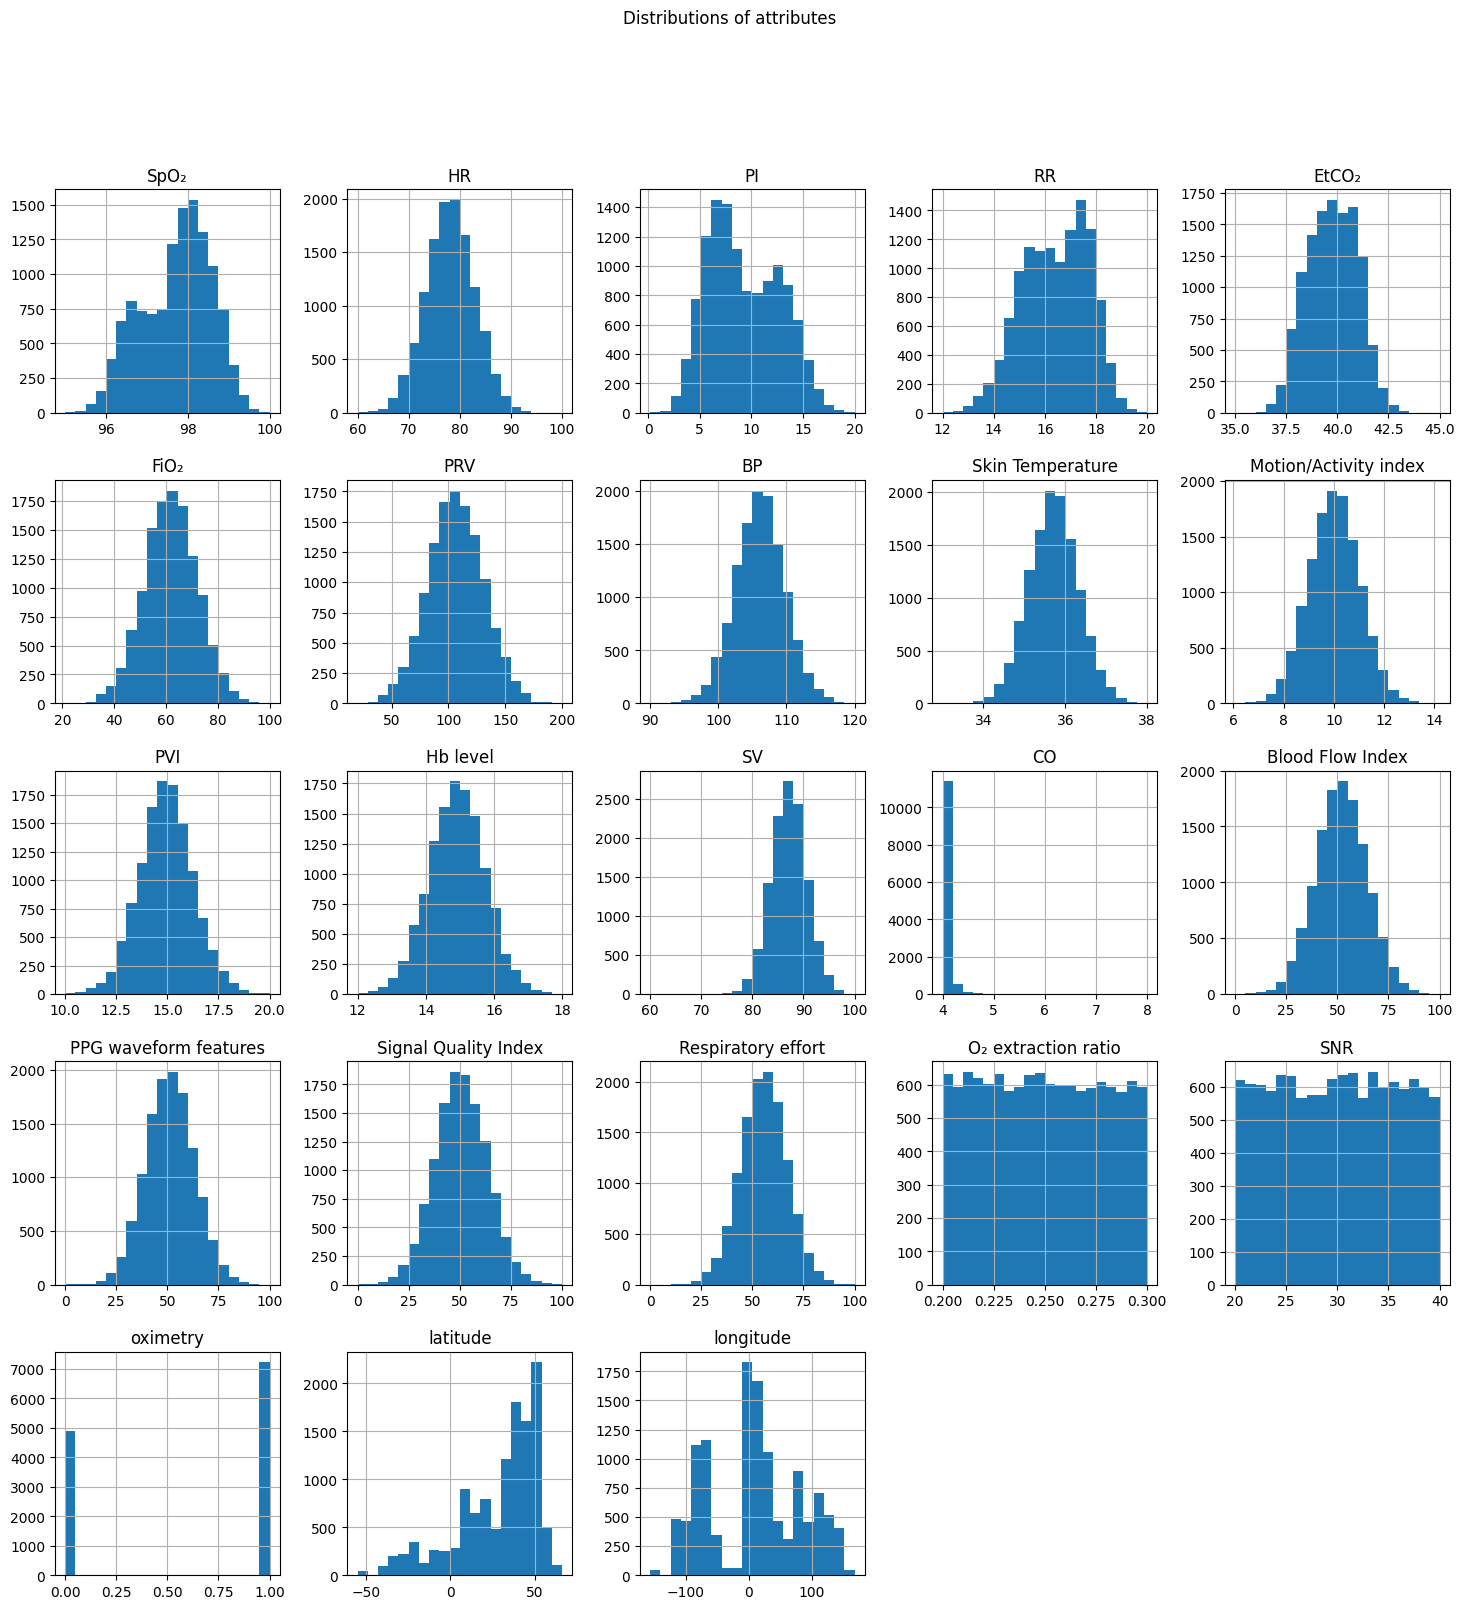

In [8]:
observation.hist(figsize=(18, 18), bins=20)
plt.suptitle("Distributions of attributes")
plt.show()

In [9]:
for col in observation.select_dtypes(include='number').columns:
    data = observation[col].dropna()
    stat, p = normaltest(data)
    print(f"{col}: {p} -> {'normal' if p > 0.05 else 'not normal'},\n {data.skew()} skew,\n {data.kurt()} kurtosis\n")

SpO₂: 1.5363139954530892e-158 -> not normal,
 -0.3371814826310864 skew,
 -0.6530604770313353 kurtosis

HR: 0.9553892210919934 -> normal,
 0.003649593813801721 skew,
 -0.012198051820739408 kurtosis

PI: 0.0 -> not normal,
 0.27027624269939854 skew,
 -0.8719145282774083 kurtosis

RR: 1.6083536221895697e-137 -> not normal,
 -0.24267009668789452 skew,
 -0.6551747223669224 kurtosis

EtCO₂: 1.1616870273859805e-64 -> not normal,
 -0.0351635784741534 skew,
 -0.5429531773823051 kurtosis

FiO₂: 0.6906212807747991 -> normal,
 -0.01904136033613549 skew,
 0.003026216294312878 kurtosis

PRV: 0.207089424253633 -> normal,
 0.009553974743601194 skew,
 -0.07466967971266136 kurtosis

BP: 1.2644694089796055e-05 -> not normal,
 -0.01514828709809658 skew,
 0.23172030878590055 kurtosis

Skin Temperature: 0.39950799138486687 -> normal,
 0.008046092454978062 skew,
 0.0587472318867559 kurtosis

Motion/Activity index: 0.6652781837578627 -> normal,
 0.016548964099385464 skew,
 -0.023477062743010535 kurtosis

PVI:

We can see that attributes with normal distribution are:
- HR
- FiO₂
- PRV
- Skin Temperature
- Motion/Activity index
- Hb level
- Blood Flow Index
- PPG waveform features
- Signal Quality Index
- Respiratory effort

<br>

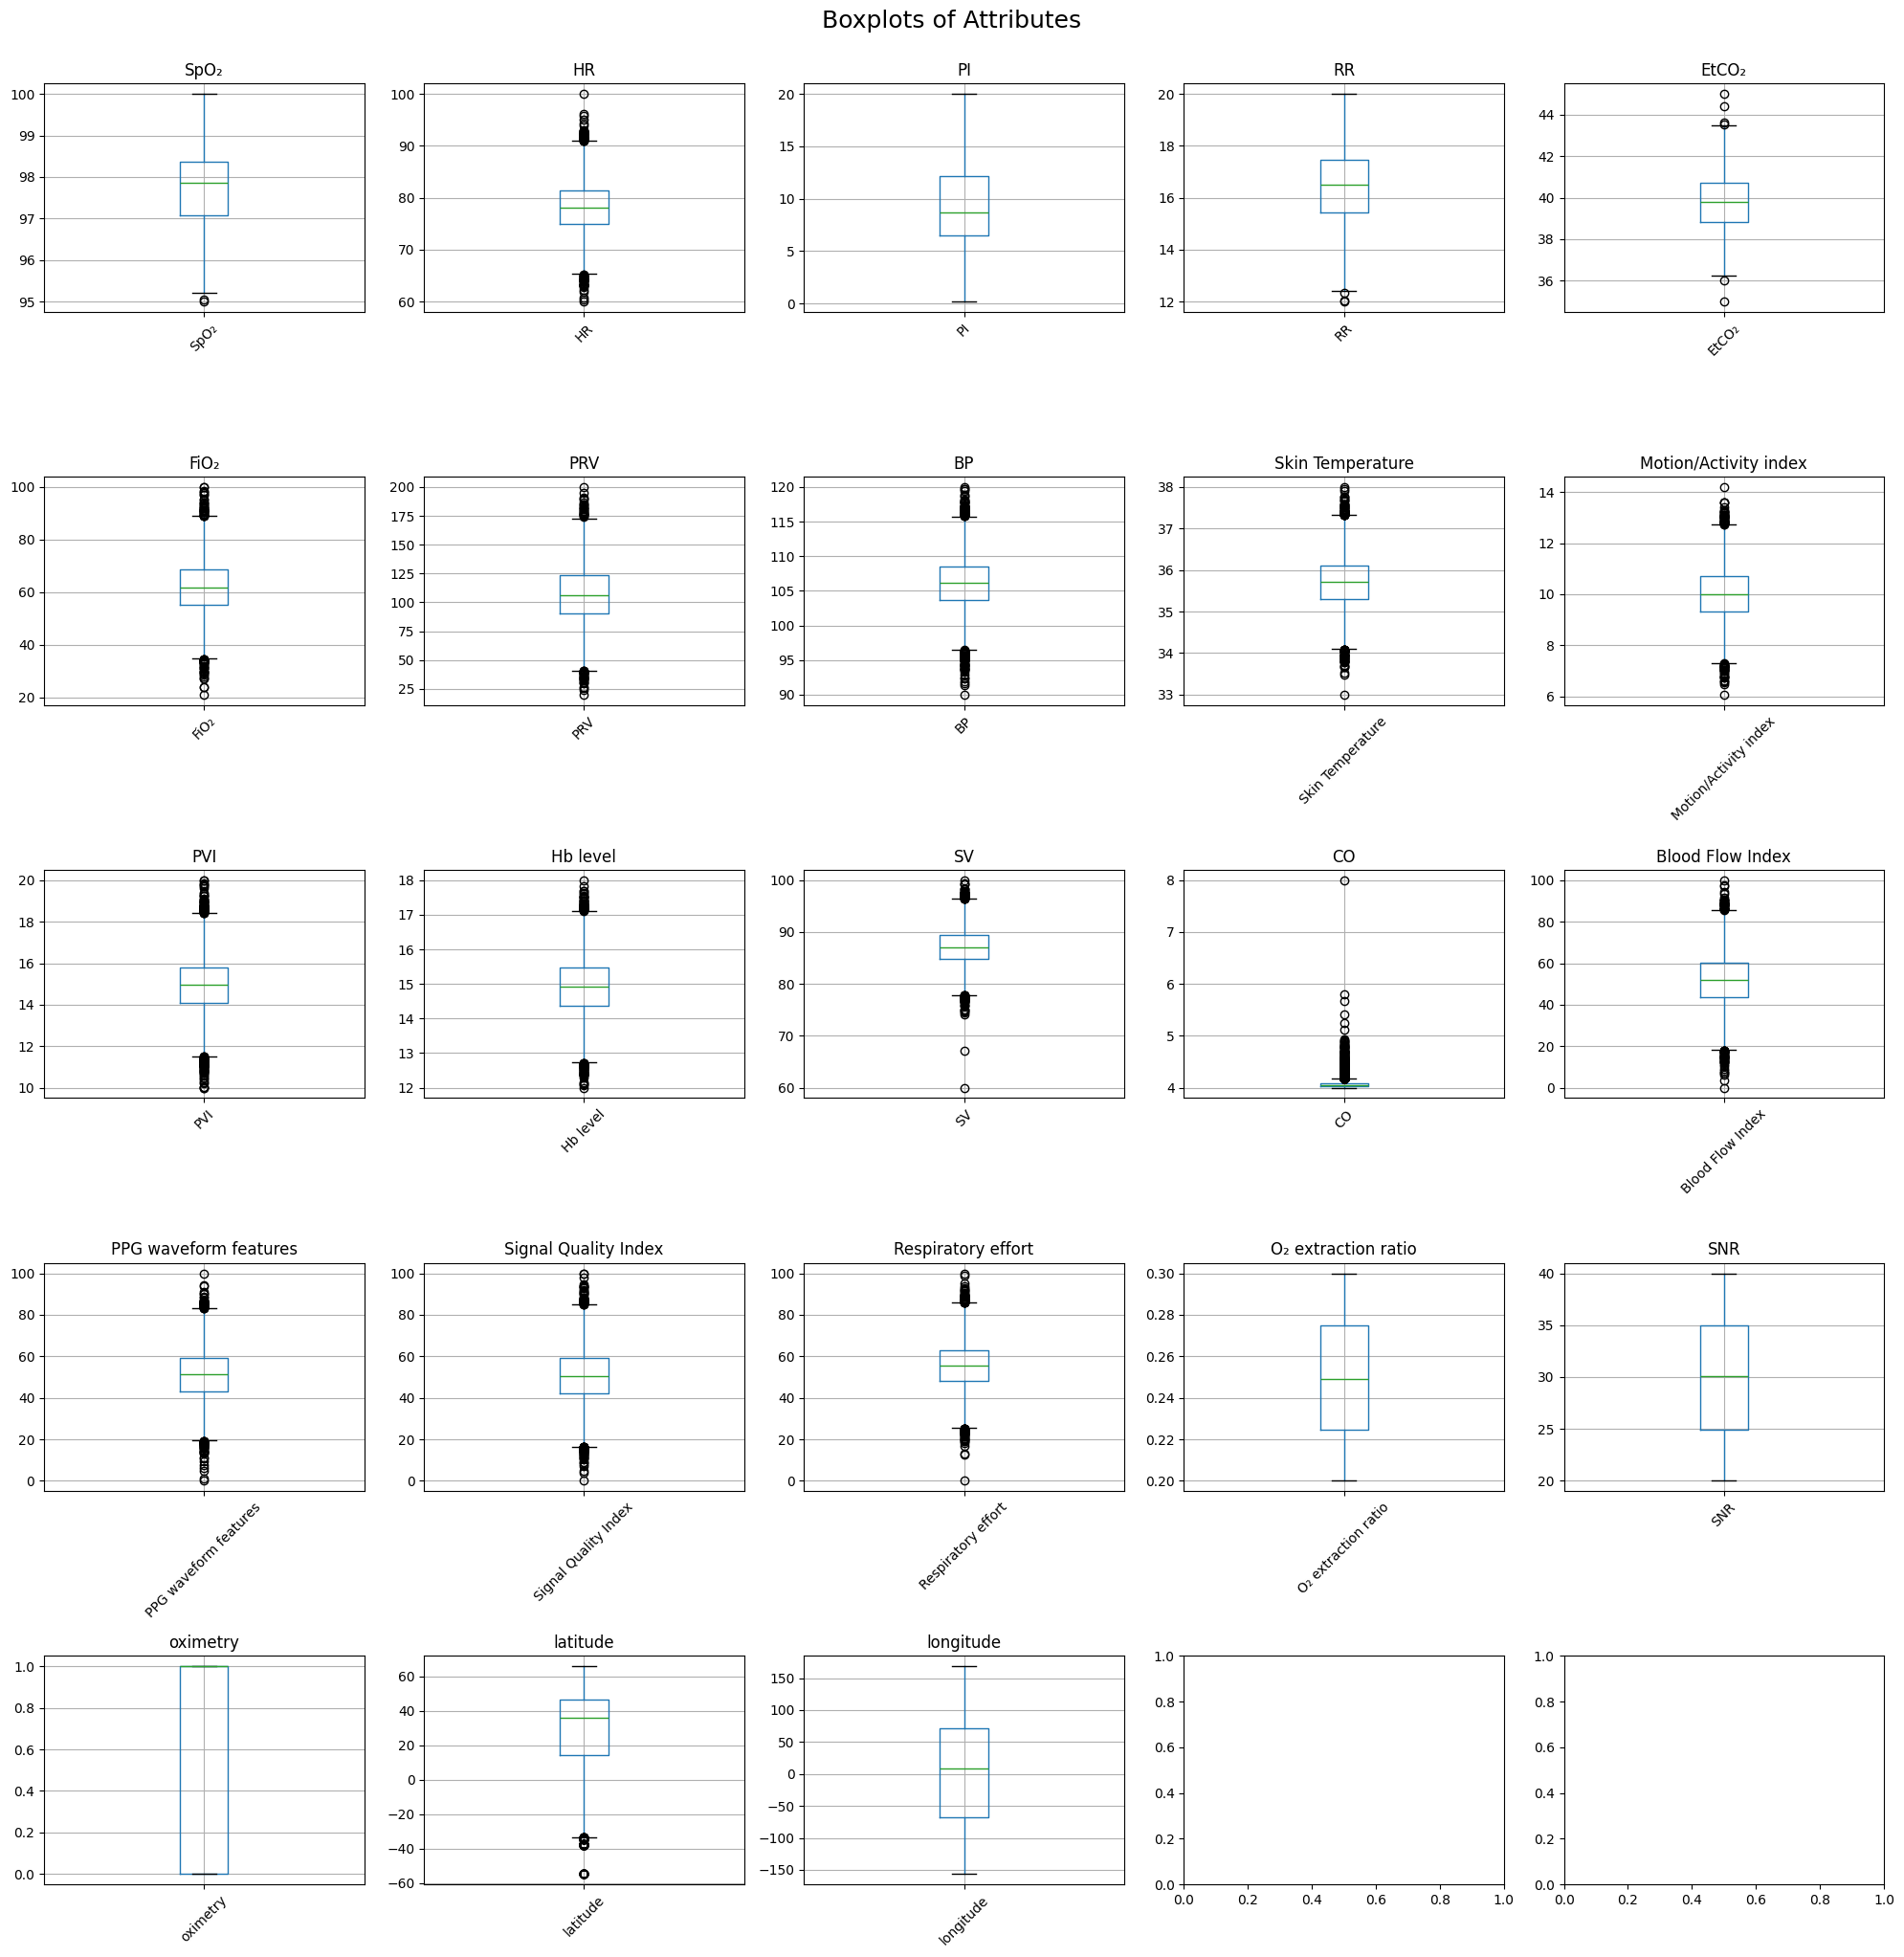

In [10]:
numeric_cols = observation.select_dtypes(include=["float64", "int64"]) #vpodstate vse
rows, cols = 5, 5
fig, axes = plt.subplots(rows, cols, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    numeric_cols.boxplot(column=col, ax=axes[i])
    axes[i].set_title(col, fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.suptitle("Boxplots of Attributes", fontsize=18, y=1.02)
plt.show()

There are some outliers for attributes, but since they are in valid range, we will keep them.

---

<br><br><br>

<br><br>

### C - Pairwise data analysis

Identify relationships and dependencies between pairs of attributes.

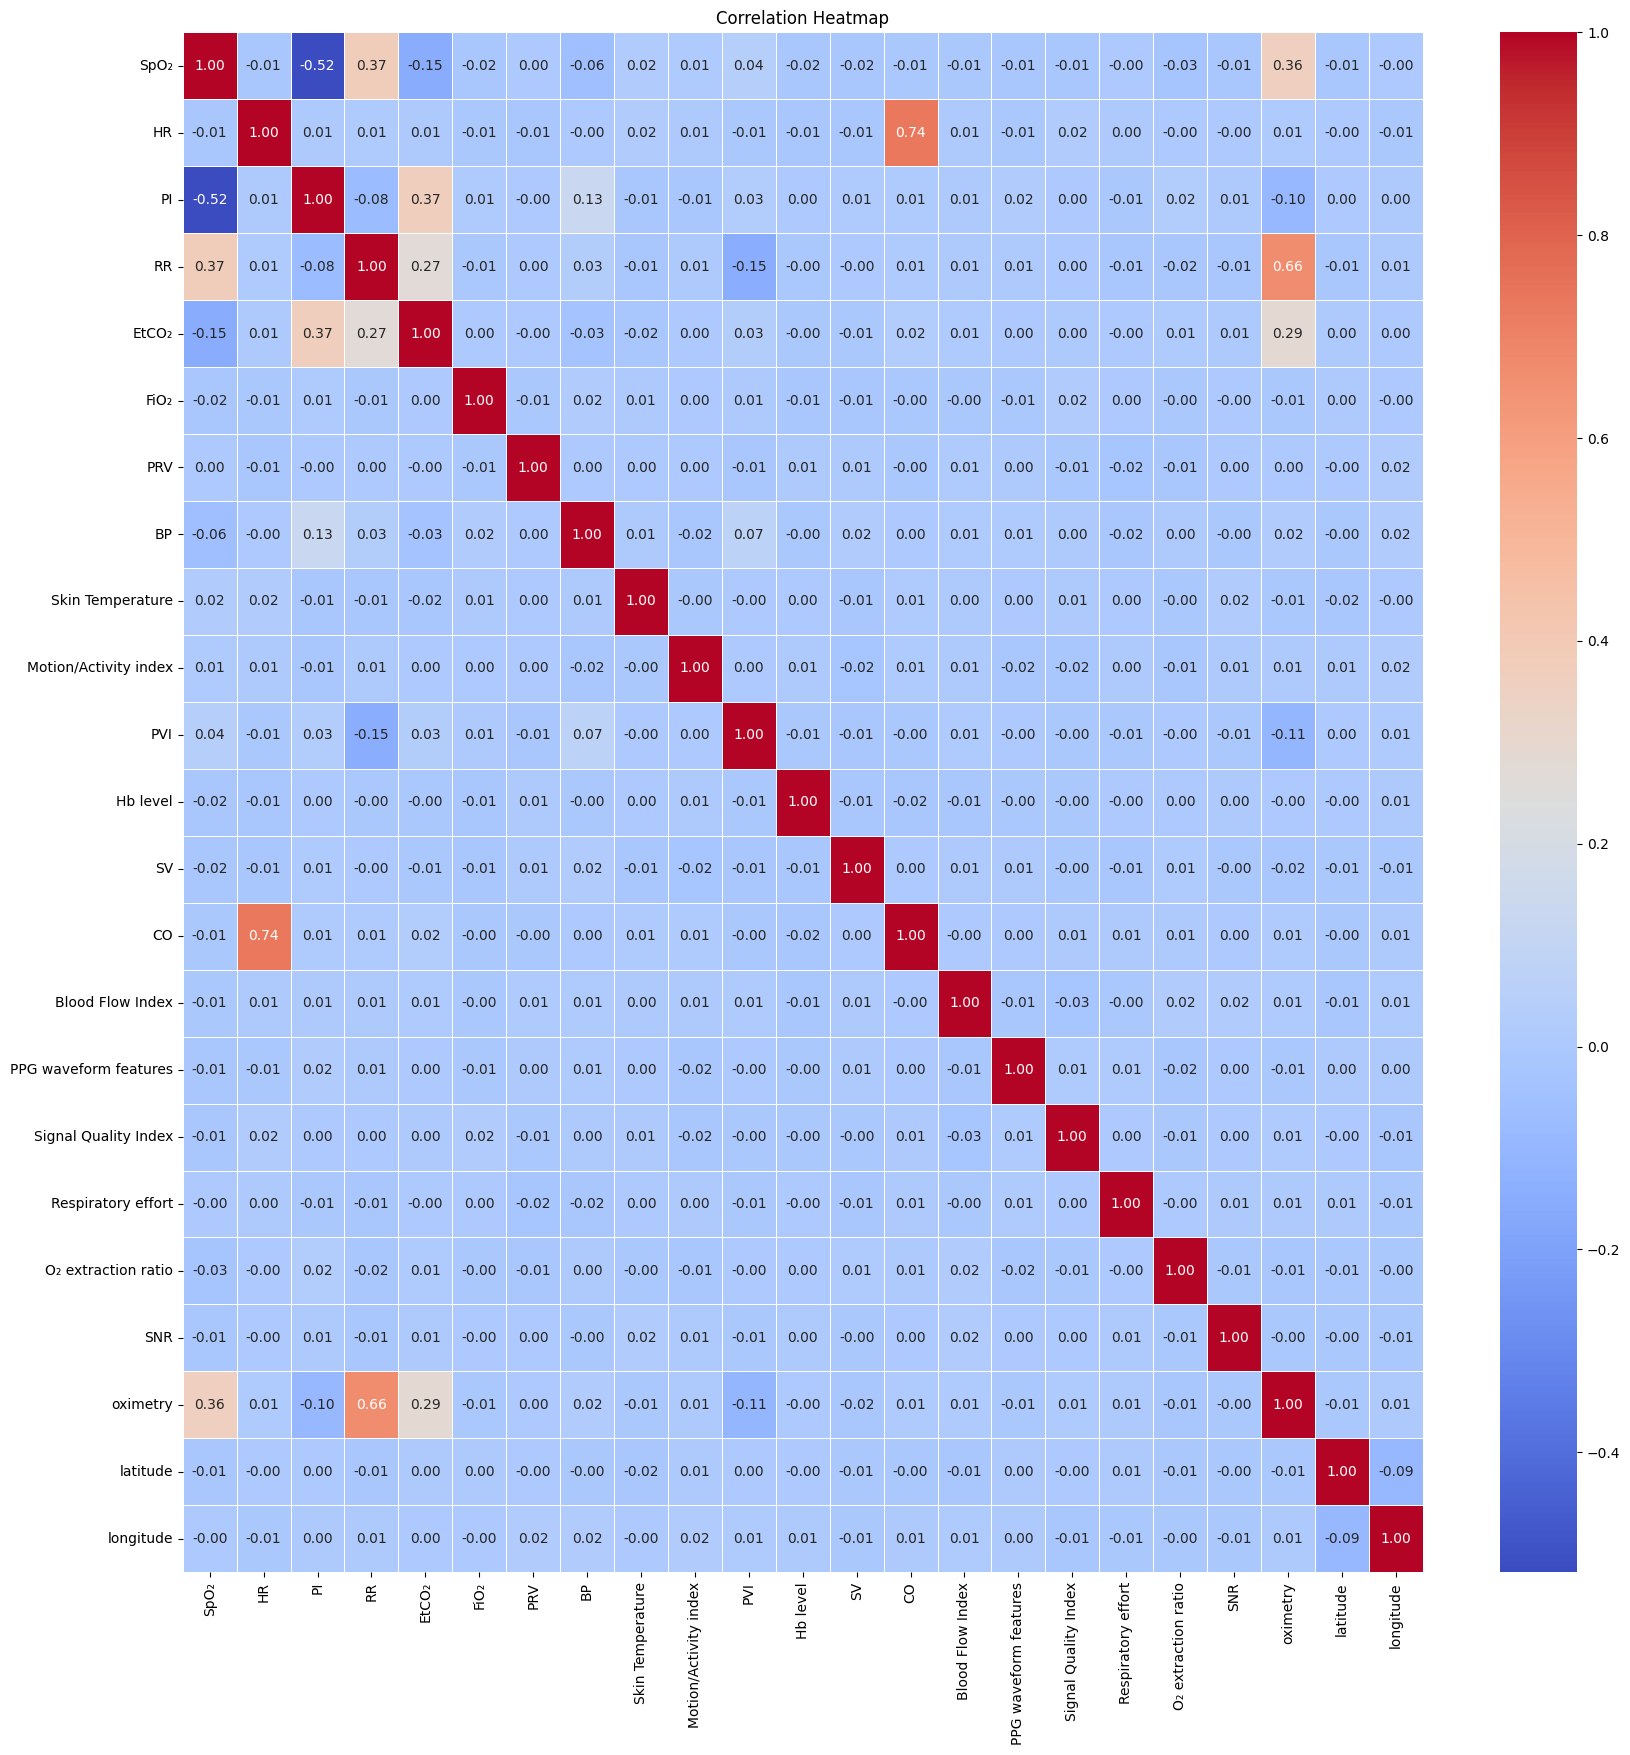

In [11]:
corr = observation.corr(numeric_only=True)

plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

The resulting heatmap highlights which attributes are most related to each other and to the target variable which is oximetry. We can safely assume which variables may be redundant or highly correlated.

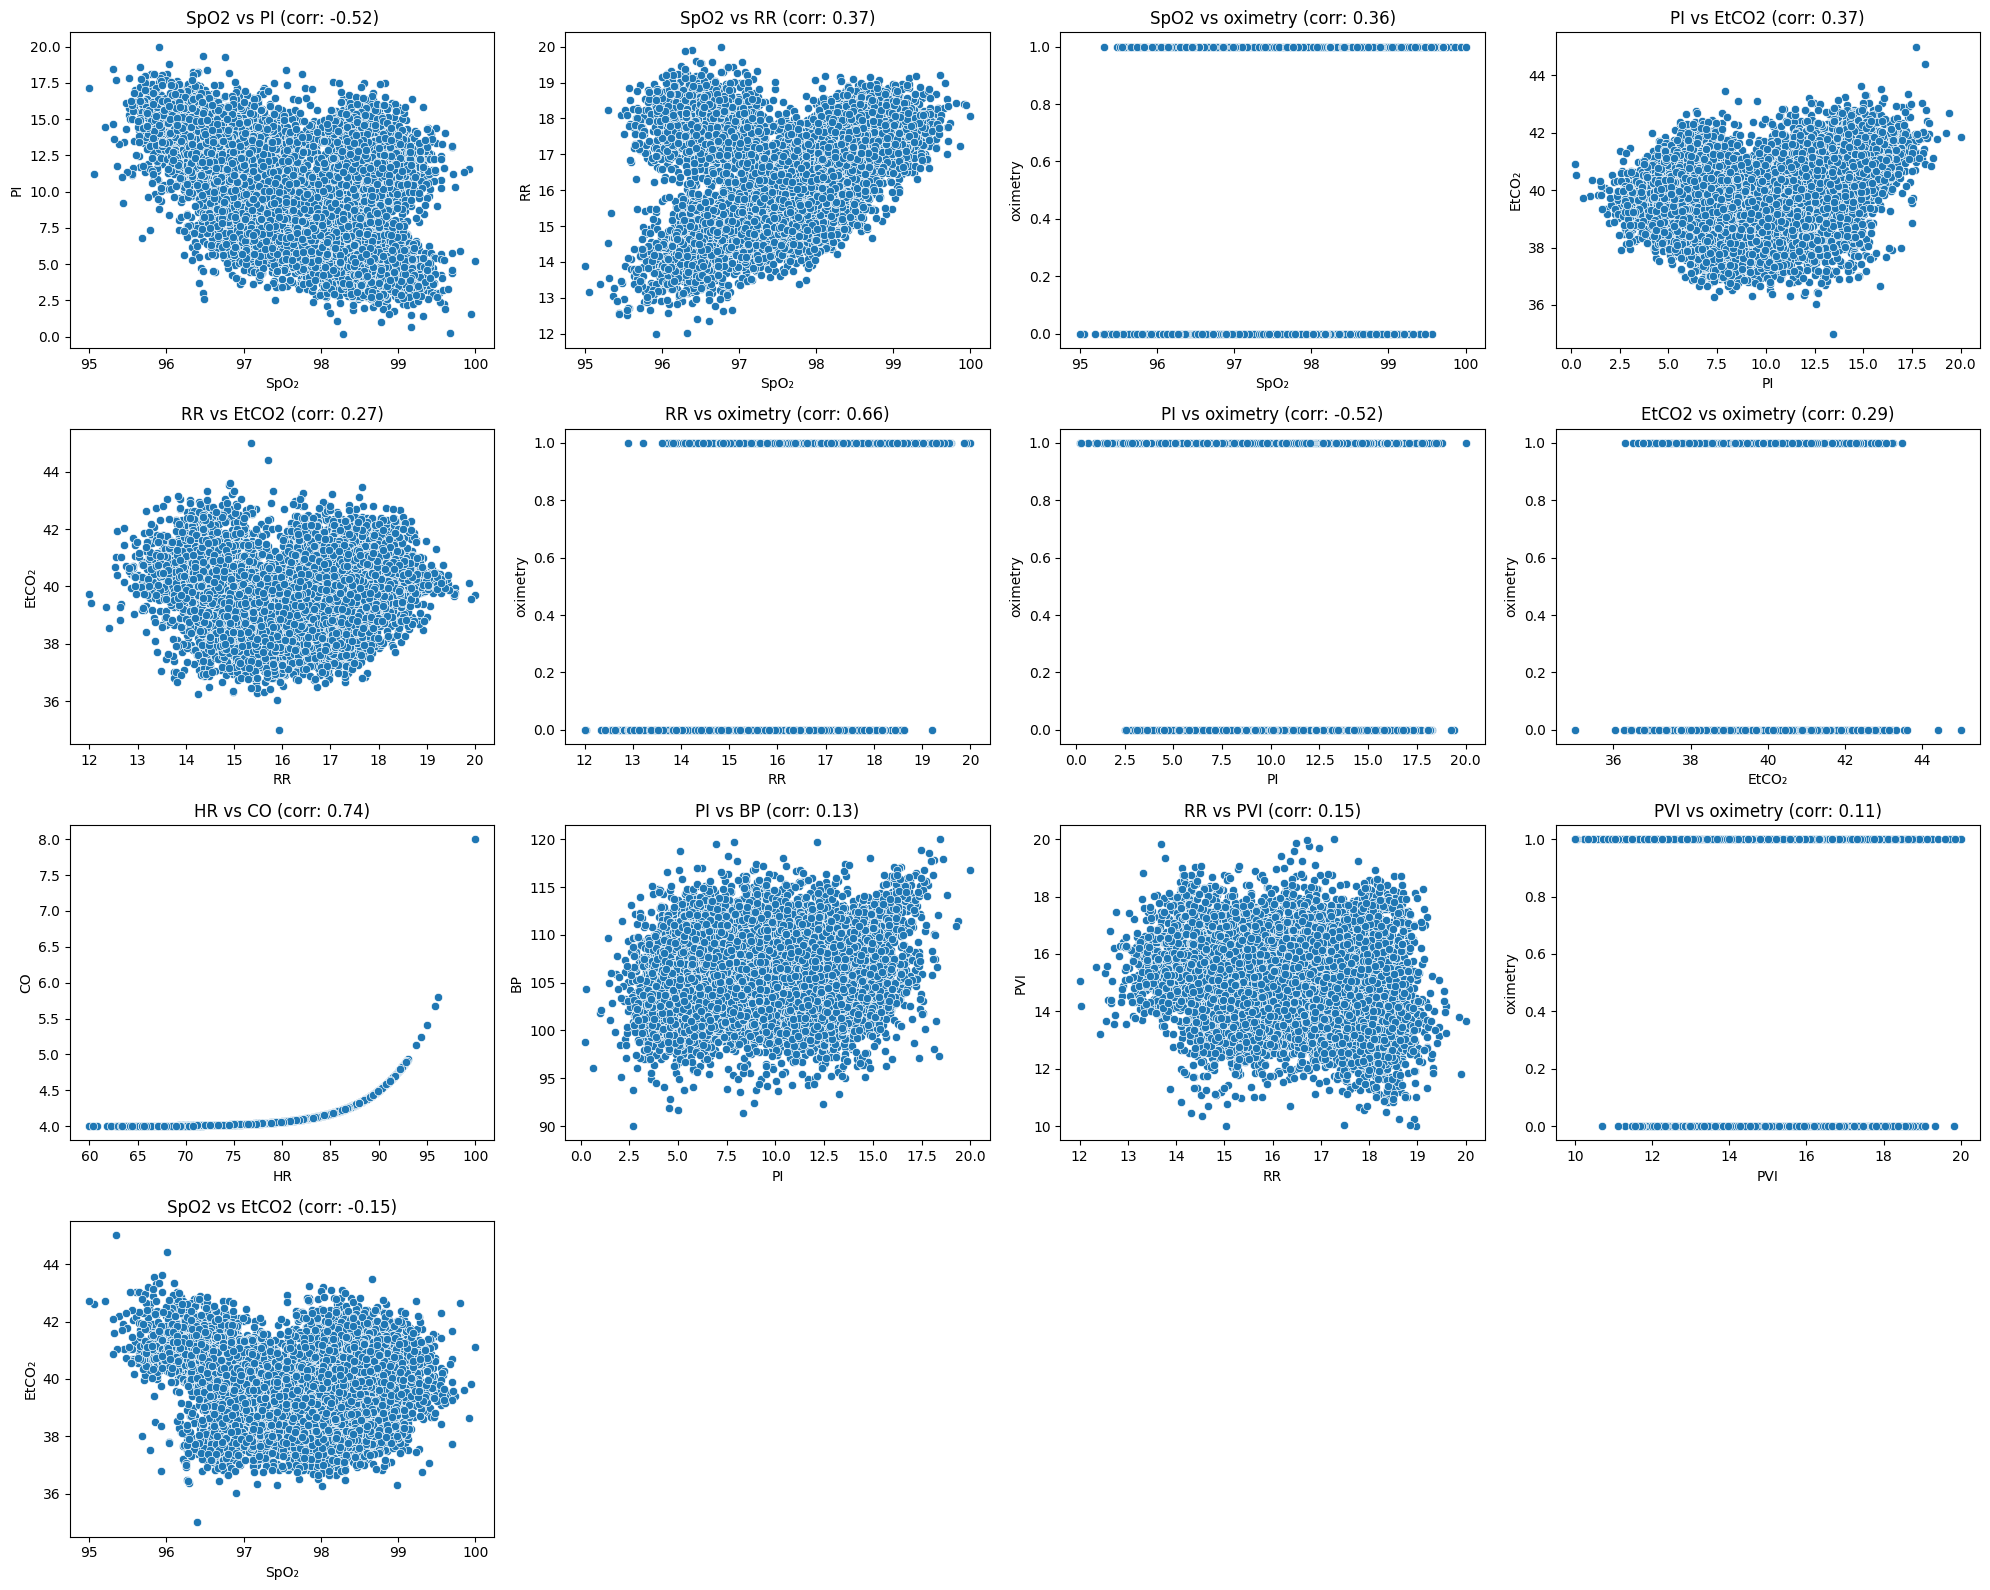

In [12]:
# Create 4x4 grid for 13 plots (we'll have 3 empty spots)
fig, axes = plt.subplots(4, 4, figsize=(20, 16))

# All pairs with |correlation| >= 0.10:

# 1. SpO2 vs PI: -0.52
sns.scatterplot(x='SpO₂', y='PI', data=observation, ax=axes[0,0])
axes[0,0].set_title('SpO2 vs PI (corr: -0.52)')

# 2. SpO2 vs RR: 0.37
sns.scatterplot(x='SpO₂', y='RR', data=observation, ax=axes[0,1])
axes[0,1].set_title('SpO2 vs RR (corr: 0.37)')

# 3. SpO2 vs oximetry: 0.36
sns.scatterplot(x='SpO₂', y='oximetry', data=observation, ax=axes[0,2])
axes[0,2].set_title('SpO2 vs oximetry (corr: 0.36)')

# 4. PI vs EtCO2: 0.37
sns.scatterplot(x='PI', y='EtCO₂', data=observation, ax=axes[0,3])
axes[0,3].set_title('PI vs EtCO2 (corr: 0.37)')

# 5. RR vs EtCO2: 0.27
sns.scatterplot(x='RR', y='EtCO₂', data=observation, ax=axes[1,0])
axes[1,0].set_title('RR vs EtCO2 (corr: 0.27)')

# 6. RR vs oximetry: 0.66
sns.scatterplot(x='RR', y='oximetry', data=observation, ax=axes[1,1])
axes[1,1].set_title('RR vs oximetry (corr: 0.66)')

# 7. PI vs oximetry: -0.52
sns.scatterplot(x='PI', y='oximetry', data=observation, ax=axes[1,2])
axes[1,2].set_title('PI vs oximetry (corr: -0.52)')

# 8. EtCO2 vs oximetry: 0.29
sns.scatterplot(x='EtCO₂', y='oximetry', data=observation, ax=axes[1,3])
axes[1,3].set_title('EtCO2 vs oximetry (corr: 0.29)')

# 9. HR vs CO: 0.74
sns.scatterplot(x='HR', y='CO', data=observation, ax=axes[2,0])
axes[2,0].set_title('HR vs CO (corr: 0.74)')

# 10. PI vs BP: 0.13
sns.scatterplot(x='PI', y='BP', data=observation, ax=axes[2,1])
axes[2,1].set_title('PI vs BP (corr: 0.13)')

# 11. RR vs PVI: 0.15
sns.scatterplot(x='RR', y='PVI', data=observation, ax=axes[2,2])
axes[2,2].set_title('RR vs PVI (corr: 0.15)')

# 12. PVI vs oximetry: 0.11
sns.scatterplot(x='PVI', y='oximetry', data=observation, ax=axes[2,3])
axes[2,3].set_title('PVI vs oximetry (corr: 0.11)')

# 13. SpO2 vs EtCO2: -0.15
sns.scatterplot(x='SpO₂', y='EtCO₂', data=observation, ax=axes[3,0])
axes[3,0].set_title('SpO2 vs EtCO2 (corr: -0.15)')

# Hide the 3 empty subplots
axes[3,1].set_visible(False)
axes[3,2].set_visible(False)
axes[3,3].set_visible(False)

plt.tight_layout()
plt.show()

The resulting visualization makes it easy to see which variables are most strongly related:

The strongest positive correlation is between HR (heart rate) and CO (cardiac output, r = 0.74).

RR (respiratory rate) and oximetry also show a notable positive correlation (r = 0.66).

Negative correlations are observed between PI (perfusion index) and both SpO₂ (r = –0.52) and oximetry (r = –0.52).

Thanks to the plots, we can visually confirm and support the correlation results. The results are showing are both the strength and pattern of dependencies between key physiological parameters and the predicted variable -> oximetry.
<br><br>

#### Patient

In [13]:
patient.head()

,residence,current_location,blood_group,job,mail,user_id,birthdate,company,name,username,ssn,registration,station_ID
0,NaN,"(Decimal('-39.6140315'), Decimal('22.351713'))",A+,NaN,schachtkaren@web.de,1135,1923-01-03,Ruppert Stey GbR,Raymund Benthin,hornigdan,226-93-4078,2021-04-21,729
1,NaN,"(Decimal('69.634637'), Decimal('66.117558'))",AB-,NaN,plopes@gmail.com,773,1918-05-23,Gonçalves e Filhos,Leonardo Mendonça,diasana-clara,35096471810,"12/16/2019, 00:00:00",668
2,NaN,"(Decimal('19.563271'), Decimal('-41.108627'))",AB-,NaN,tanakayoko@hotmail.com,1532,2001-01-04,中村食品有限会社,吉田 陽子,sayuri90,066-73-4209,2023/01/30,482
3,NaN,"(Decimal('34.010482'), Decimal('129.946434'))",O-,NaN,brandoncruz@yahoo.com,2025,NaN,Silva-Gardner,Scott Thomas,rossjoy,368-27-2375,09 Feb 2024,284
4,NaN,"(Decimal('61.148803'), Decimal('115.371931'))",O+,NaN,serragliogiorgio@tiscali.it,638,1997-05-14,Ortese-Agnesi s.r.l.,Dott. Maurilio Zanazzo,orlandogilardoni,SNSGNT39E71B896C,2022-03-09,572


We can see that current_location contains latitude and longitude, therefore we have decided to split them into 2 columns. Also there are different date formats which we need to make into same format.

In [14]:
coords = patient['current_location'].str.extract(
    r"Decimal\('([-0-9.]+)'\).*Decimal\('([-0-9.]+)'\)"
)

patient['latitude'] = pd.to_numeric(coords[0], errors='coerce')
patient['longitude'] = pd.to_numeric(coords[1], errors='coerce')

patient.describe()

,residence,user_id,station_ID,latitude,longitude
count,0.0,2128.000000,2128.000000,2022.000000,2022.000000
mean,NaN,1074.037594,390.836936,0.449233,3.536263
std,NaN,611.516264,224.274660,52.214570,102.595709
min,NaN,0.000000,0.000000,-89.974802,-179.928645
25%,NaN,554.000000,193.000000,-45.312505,-85.899696
50%,NaN,1074.500000,394.000000,0.405269,8.928997
75%,NaN,1607.250000,587.250000,46.580815,92.708868
max,NaN,2127.000000,770.000000,89.835507,179.913557


Here we have split the attribute "current_location" which before contained both latitude and longtitude to the seperate attributes. With this we hope that we will be able to connect several tables.

In [15]:
station.head()

,location,code,revision,station,latitude,longitude
0,Europe/Madrid,ES,"12/22/2016, 00:00:00",San Juan de Aznalfarache,37.35813,-6.03731
1,America/Bogota,CO,22 Jul 2023,Villa del Rosario,7.83389,-72.47417
2,Asia/Kolkata,IN,2022/09/04,Rangia,26.44931,91.61356
3,America/Chicago,US,2021/03/29,Rolla,37.95143,-91.77127
4,Europe/Berlin,DE,2023/09/12,Albstadt,48.21644,9.02596


In [28]:
station.describe()

,latitude,longitude
count,772.000000,772.000000
mean,28.652487,9.132671
std,23.967608,73.458813
min,-54.800000,-156.474320
25%,14.443685,-67.331220
50%,36.230840,8.874040
75%,46.372028,69.920535
max,65.933810,168.313660


In [29]:
observation.describe()

,SpO₂,HR,PI,RR,EtCO₂,FiO₂,PRV,BP,Skin Temperature,Motion/Activity index,...,CO,Blood Flow Index,PPG waveform features,Signal Quality Index,Respiratory effort,O₂ extraction ratio,SNR,oximetry,latitude,longitude
count,12107.000000,12107.000000,12107.000000,12107.000000,12107.000000,12107.000000,12107.000000,12107.000000,12107.000000,12107.000000,...,12107.000000,12107.000000,12107.000000,12107.000000,12107.000000,12107.000000,12107.000000,12107.000000,12107.000000,12107.000000
mean,97.720877,78.139220,9.280387,16.420159,39.761272,61.836198,106.629738,106.142109,35.712456,10.013732,...,4.068934,51.897652,51.293918,50.545308,55.540997,0.249564,29.975732,0.596845,28.671404,9.237063
std,0.849157,4.782149,3.432338,1.287131,1.220140,10.182272,24.520873,3.676340,0.606630,1.009803,...,0.094006,12.439194,11.859092,12.741621,11.301895,0.028901,5.765204,0.490552,23.945771,73.361001
min,95.000000,60.000000,0.200000,12.000000,35.000000,21.000000,20.000000,90.000000,33.000000,6.063736,...,4.000000,0.000000,0.000000,0.000000,0.000000,0.200000,20.000000,0.000000,-54.800000,-156.474320
25%,97.073862,74.938806,6.543803,15.418921,38.840854,55.076625,90.088136,103.704873,35.307574,9.331576,...,4.021535,43.468302,43.298068,42.100520,47.965348,0.224556,24.960719,0.000000,14.420440,-67.331220
50%,97.850262,78.124134,8.703433,16.493047,39.782823,61.853122,106.339196,106.122106,35.711898,10.012485,...,4.041752,51.983722,51.298702,50.436869,55.588062,0.249187,30.054808,1.000000,36.246240,8.881040
75%,98.359154,81.345487,12.159623,17.466124,40.708415,68.679155,123.256573,108.536922,36.114306,10.698413,...,4.081694,60.322630,59.309318,59.247765,63.116464,0.274669,34.948440,1.000000,46.518720,71.211690
max,100.000000,100.000000,20.000000,20.000000,45.000000,100.000000,200.000000,120.000000,38.000000,14.205771,...,8.000000,100.000000,100.000000,100.000000,100.000000,0.300000,40.000000,1.000000,65.933810,168.313660


There are different date formats which we need to make into same format. Furthermore we have noticed that sation.latitude and station.longitude have same distributions, std and mean as observation.latitude and observation.longitude, we can expect that these connect the two datasets.

In [17]:
station_coords = set(zip(station['latitude'], station['longitude']))

observation['matches_station'] = observation.apply(
    lambda row: (row['latitude'], row['longitude']) in station_coords, axis=1
)

num_matches = observation['matches_station'].sum()
total_obs = len(observation)

print(f"{num_matches} out of {total_obs} observations match station coordinates.")

12107 out of 12107 observations match station coordinates.


It was confirmed that station cordinates match with observation cordinates.

---

<br><br><br>

### D - Potential predictors

Identify dependencies between the predicted variable and other variables (potential predictors).

In [18]:
numeric_cols = observation.select_dtypes(include=np.number).columns

corr_spearman = observation[numeric_cols].corr(method='spearman')['oximetry'].sort_values(ascending=False)

print(corr_spearman)

oximetry                 1.000000
RR                       0.669143
SpO₂                     0.400411
EtCO₂                    0.307589
BP                       0.018955
Blood Flow Index         0.011153
HR                       0.010209
CO                       0.010190
Respiratory effort       0.006981
Signal Quality Index     0.006935
longitude                0.006118
Motion/Activity index    0.006110
Hb level                -0.001174
SNR                     -0.003230
PRV                     -0.003779
PPG waveform features   -0.004232
FiO₂                    -0.004978
Skin Temperature        -0.006122
latitude                -0.007828
O₂ extraction ratio     -0.010159
SV                      -0.019628
PVI                     -0.105327
PI                      -0.119275
Name: oximetry, dtype: float64


prelozit!
Na základe Spearmanovej korelácie boli identifikované atribúty s najsilnejšou väzbou na cieľovú premennú „oximetry“.
Najvyššiu pozitívnu koreláciu vykazuje premenná „RR“ (respiračná frekvencia), nasledovaná „SpO₂“ a „EtCO₂“.
Ostatné premenné majú veľmi nízku alebo zanedbateľnú koreláciu, čo naznačuje, že ich vplyv na hodnotu oximetrie je obmedzený.
Korelácie boli vizualizované na grafe nižšie, ktorý zobrazuje relatívnu silu vzťahu jednotlivých atribútov k oximetrii.

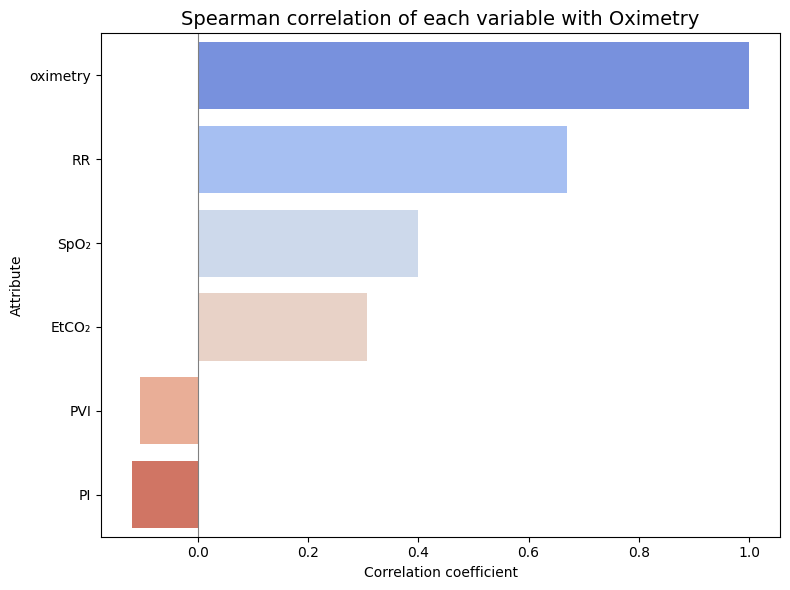

In [19]:
corr_filtered = corr_spearman[abs(corr_spearman) > 0.1]
plt.figure(figsize=(8, 6))
sns.barplot(
    x=corr_filtered.values,
    y=corr_filtered.index,
    hue=corr_filtered.index,
    palette='coolwarm',
    orient='h',
    legend=False
)
plt.title('Spearman correlation of each variable with Oximetry', fontsize=14)
plt.xlabel('Correlation coefficient')
plt.ylabel('Attribute')
plt.axvline(0, color='gray', linewidth=0.8)
plt.tight_layout()
plt.show()

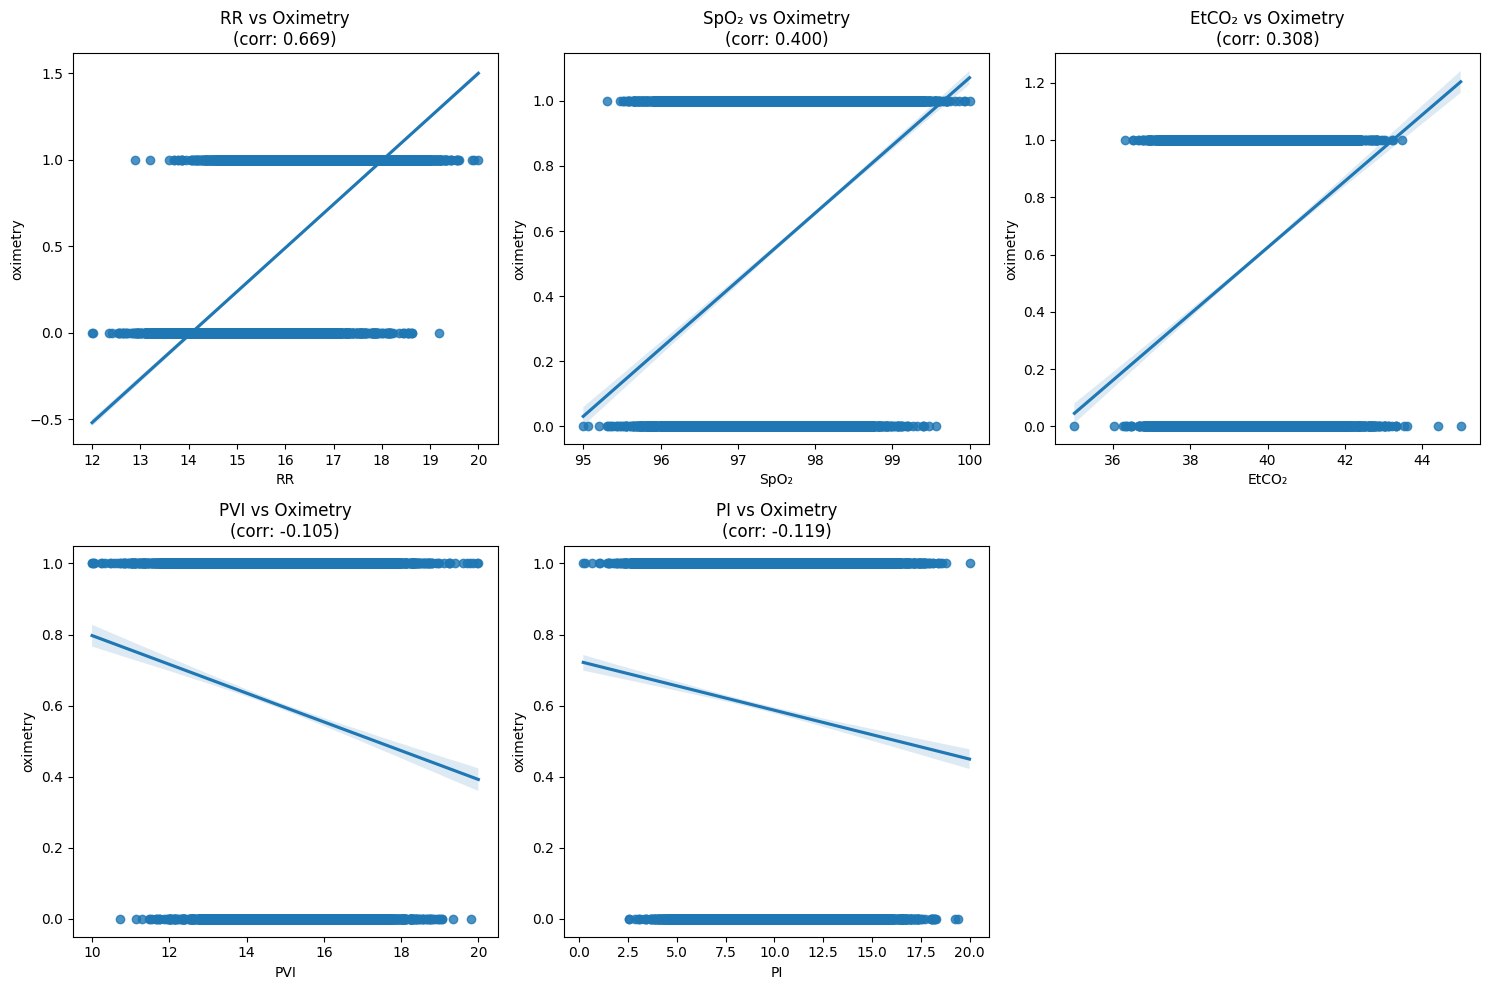

In [20]:
#create grid dimensions
n_plots = len(corr_filtered) - 1 #(-1 bcs we do not need the first attribute)
n_cols = 3
n_rows = (n_plots + n_cols - 1) // n_cols

#here we create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))

#we neeed to faltten the axis
if n_rows > 1:
    axes = axes.flatten()
else:
    axes = [axes] if n_cols == 1 else axes

# Create regplot for each attribute in corr_filtered (we skip the first bcs oximentry vs oximetry is useless)
for i, attribute in enumerate(corr_filtered.index[1:], 0):  # Start from index 1, enumerate from 0
    sns.regplot(x=attribute, y='oximetry', data=observation, ax=axes[i])
    axes[i].set_title(f'{attribute} vs Oximetry\n(corr: {corr_filtered[attribute]:.3f})')

#remove last empty plot
for i in range(n_plots, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

### E - Observations)

Observations made by us, which we determined based on us studying this topic nad datasets

## 1.2 - Identification of problems, data integration, and cleaning

## A - Data problems

Identify and initially address data problems such as: unsuitable data structure, duplicate records that may arise after certain transformations, inconsistent formats, missing values, and outliers. Other (not listed) problems may also occur, or fewer problems than those mentioned.

In [21]:
# code

Comment

## B -  Data accuracy check

Do the data contain abnormal values?
Do they include illogical relationships caused by data collection or annotation errors?

In [22]:
# code

Comment

### C - Outlier detection

Try to solve the problem using at least two techniques, e.g.:
 - Removing outliers or extreme observations
 - Replacing outliers with boundary values of the distribution (e.g., 5%, 95%)

In [23]:
# code

Comment

## 1.3 Formulation and statistical verification of hypotheses about the data

### A - Hypotheses

Formulate two hypotheses about the data in the context of the given prediction task. Verify the formulated hypotheses using appropriately chosen statistical tests.
Example formulation:
“FiO₂ has a higher average value in the state with oximetry than without it.”

#### Hypothesis 1

Text of the hypothesis

Test comment

In [24]:
# code

Comment

#### Hypothesis 2

Text of the hypothesis

Test comment

In [25]:
# code

Comment

### B - Statistical power

Verify whether your statistical tests have sufficient support from the data — that is, whether they have enough statistical power.

#### Hypothesis 1

Comment

In [26]:
# code

#### Hypothesis 2

Comment

In [27]:
# code

# Conclusion